In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
car_sales = pd.read_csv("car_prices.csv")

In [61]:
car_sales.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [62]:
car_sales.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [63]:
car_sales['year'].max()

2015

In [64]:
max_occurence = car_sales['year'].value_counts().idxmax()

In [65]:
max_count = car_sales['year'].value_counts().max()

In [66]:
print(max_count)

102315


In [67]:
print(max_occurence)

2012


In [68]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
year            558837 non-null int64
make            548536 non-null object
model           548438 non-null object
trim            548186 non-null object
body            545642 non-null object
transmission    493485 non-null object
vin             558833 non-null object
state           558837 non-null object
condition       547017 non-null float64
odometer        558743 non-null float64
color           558088 non-null object
interior        558088 non-null object
seller          558837 non-null object
mmr             558799 non-null float64
sellingprice    558825 non-null float64
saledate        558825 non-null object
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


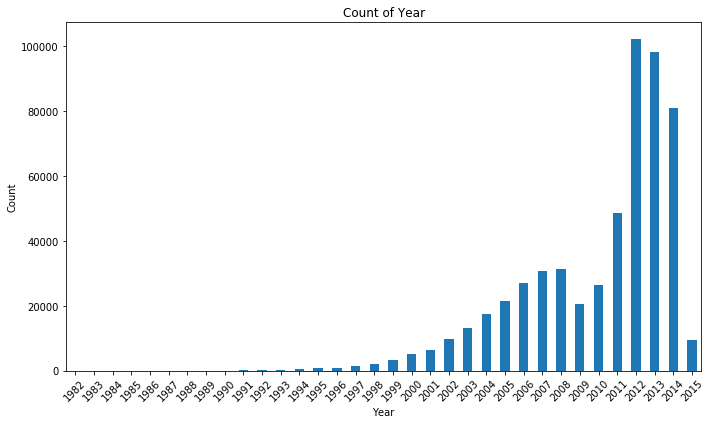

In [69]:
plt.figure(figsize=(10,6))
car_sales['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Count of Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
null_values = car_sales.isnull().sum()

In [71]:
print(null_values)

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [72]:
transmission_types = car_sales['transmission'].value_counts()

In [73]:
print(transmission_types)

automatic    475915
manual        17544
sedan            15
Sedan            11
Name: transmission, dtype: int64


In [74]:
car_sales['transmission'] = car_sales['transmission'].replace('Sedan','sedan')

In [75]:
transmission_types = car_sales['transmission'].value_counts()
print(transmission_types)

automatic    475915
manual        17544
sedan            26
Name: transmission, dtype: int64


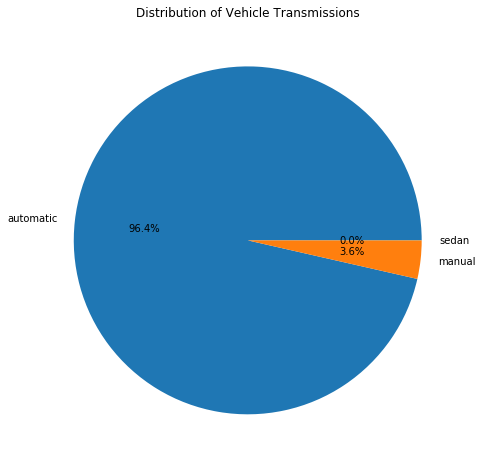

In [76]:
plt.figure(figsize=(8, 8))
plt.pie(transmission_types, labels=transmission_types.index, autopct='%1.1f%%')
plt.title('Distribution of Vehicle Transmissions')
plt.show()

In [77]:
null_values = car_sales.isnull().sum()
print(null_values)

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [78]:
car_sales = car_sales.interpolate(method='linear')

In [79]:
null_values = car_sales.isnull().sum()
print(null_values)

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition           0
odometer            0
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate           12
dtype: int64


In [80]:
car_sales.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [81]:
columns_to_fill = ['make','model','trim','body','transmission','vin','color','interior','saledate']
car_sales[columns_to_fill] = car_sales[columns_to_fill].fillna(method='ffill')

In [82]:
null_values = car_sales.isnull().sum()
print(null_values)

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


In [83]:
transmission_types = car_sales['transmission'].value_counts()
print(transmission_types)

automatic    538763
manual        20046
sedan            28
Name: transmission, dtype: int64


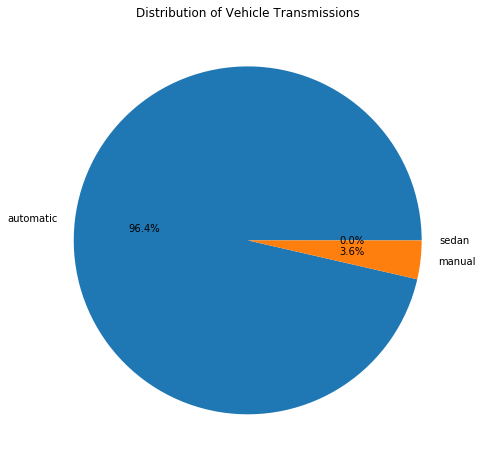

In [84]:
plt.figure(figsize=(8, 8))
plt.pie(transmission_types, labels=transmission_types.index, autopct='%1.1f%%')
plt.title('Distribution of Vehicle Transmissions')
plt.show()

In [85]:
max_price = car_sales['sellingprice'].max()
print(max_price)

230000.0


In [86]:
min_price = car_sales['sellingprice'].min()
print(min_price)

1.0


In [87]:
avg_price = car_sales['sellingprice'].mean()
print(avg_price)

13611.371449993469


KeyError: 'sellingprice'

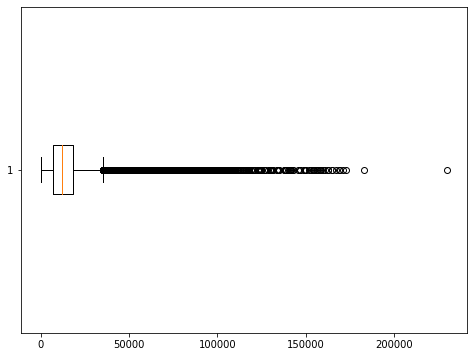

In [96]:
plt.figure(figsize=(8, 6))
box = plt.boxplot(car_sales['sellingprice'], vert=False)
plt.title('Box Plot of {sellingprice}'.format('sellingprice'))
plt.xlabel('Values')
plt.show()

whiskers = [item.get_ydata()[1] for item in box['whiskers']]
outliers = df[(df[column_name] < whiskers[0]) | (df[column_name] > whiskers[1])]

# Print outliers
print("Outliers:")
print(outliers)

In [98]:
n = 5
lowest_values = car_sales.nsmallest(n,'sellingprice')
print("Lowest values in column: '{}':".format('sellingprice'))
print(lowest_values)

Lowest values in column: 'sellingprice':
        year           make             model     trim          body  \
7566    2002           Ford  F-350 Super Duty      XLT      Crew Cab   
48453   2003  Mercedes-Benz           E-Class     E500         Sedan   
293223  2014           Ford      E-Series Van    E-250  E-Series Van   
348252  1995          Isuzu             Rodeo       LS           SUV   
5184    1997           ford          explorer  awd xlt           SUV   

       transmission                vin state  condition  odometer  color  \
7566      automatic  1ftsw31f52ed16477    ca        2.0   26647.5  white   
48453     automatic  wdbuf70j73a269529    ga       21.0       1.0  black   
293223    automatic  1ftne2ew6eda13643    tx       41.0   31886.0  white   
348252    automatic  4s2cm58v9s4375559    va        1.0  254132.0    red   
5184      automatic  1fmdu35p5vza56513    ca        1.0  195748.0  white   

       interior                      seller      mmr  sellingprice  \

In [100]:
values_less_than_2000 = car_sales[car_sales['sellingprice'] < 2000]
print("Rows with values less than 2000 in column '{}':".format('sellingprice'))
print(values_less_than_2000)

Rows with values less than 2000 in column 'sellingprice':
        year        make          model         trim          body  \
697     2013      Nissan         Maxima        3.5 S         Sedan   
1000    2012    Chrysler            200           LX         Sedan   
2191    2014   Chevrolet          Spark          1LT     Hatchback   
2758    2010        Ford          Focus           SE         Sedan   
2942    2009       Honda          Civic           LX         Sedan   
3076    2008       Honda          Civic           LX         Sedan   
3090    2008    Chrysler            300           LX         Sedan   
3147    2008      Nissan         Sentra            2         Sedan   
3166    2008        Jeep        Compass        Sport           SUV   
3246    2008     Pontiac             G6           GT         Sedan   
3300    2007       Dodge        Charger           RT         Sedan   
3347    2007    Chrysler     PT Cruiser      Touring         Wagon   
3365    2007         Kia        